## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [43]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [44]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [45]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [46]:
# Find number of zeros in each column
(diabetes_data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [47]:
diabetes_data.Glucose.replace(0, np.nan, inplace=True)
diabetes_data.BloodPressure.replace(0, np.nan, inplace=True)
diabetes_data.SkinThickness.replace(0, np.nan, inplace=True)
diabetes_data.Insulin.replace(0, np.nan, inplace=True)
diabetes_data.BMI.replace(0, np.nan, inplace=True)

In [48]:
diabetes_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**<font color='teal'> Plot histograms of each column. </font>**

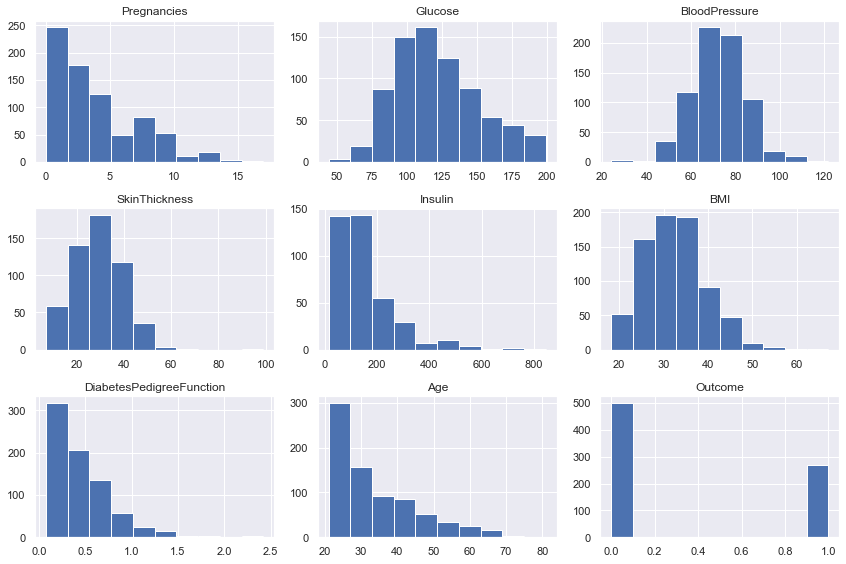

In [49]:
diabetes_data.hist(figsize=(12,8))
plt.tight_layout()
plt.show();

#### Replace the zeros with mean and median values.

In [52]:
# Replace distributions that look normal with the mean and those with fat and long tails with the median
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

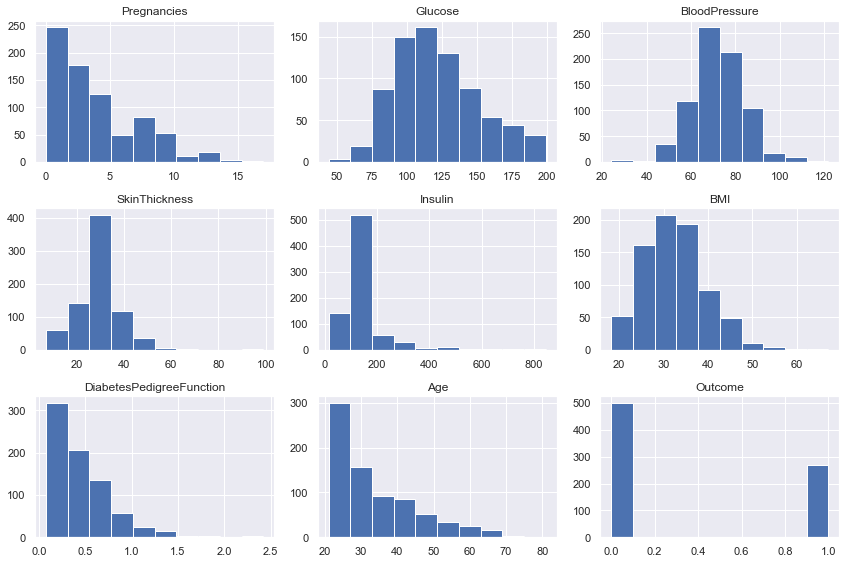

In [53]:
diabetes_data.hist(figsize=(12,8))
plt.tight_layout()
plt.show();

#### Plot the correlation matrix heatmap

Correlation between various features


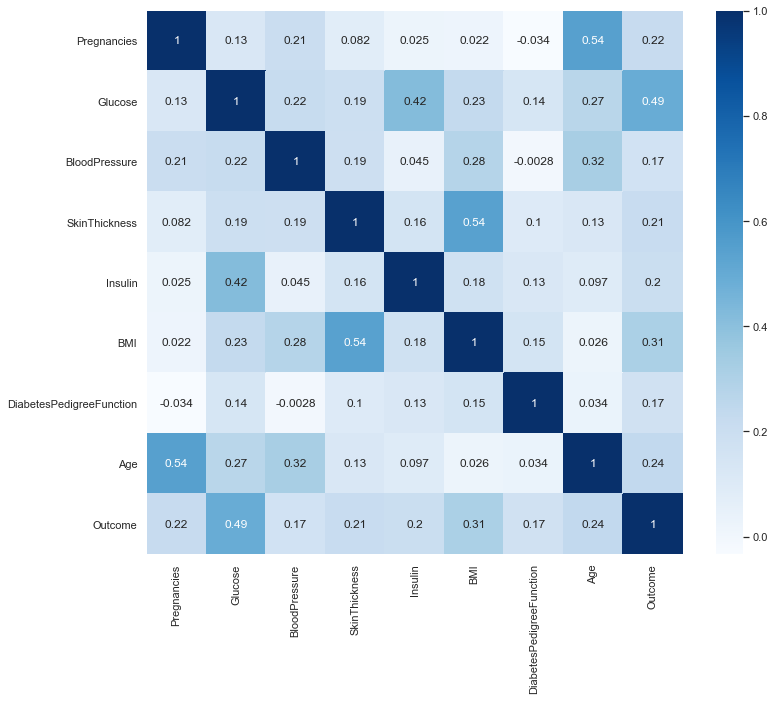

In [41]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True, cmap ='Blues')

In [55]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**<font color='teal'> Define the `y` variable as the `Outcome` column and the feature variable `X` as the rest of columns
    `['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']`.</font>**

In [56]:
y = diabetes_data['Outcome']
X = diabetes_data.drop(columns='Outcome', axis=1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 2.63823341,  0.11300448,  1.43086546, ...,  1.54777249,
         0.37437012,  0.7252145 ],
       [-0.86058859, -0.11566574, -2.39890043, ...,  0.42197261,
        -0.55800814, -0.70130633],
       [-0.86058859,  1.90969907,  0.4317961 , ...,  1.06325102,
         2.45145038, -0.9530453 ],
       ...,
       [-0.86058859, -1.09568097, -4.06401604, ..., -0.67532601,
         0.30051837, -1.03695829],
       [ 1.47195941,  0.37434188,  0.09877298, ..., -0.94608801,
        -0.00412007,  3.99782113],
       [ 0.01411691, -0.37700313, -0.06773859, ...,  0.64998271,
         2.85763497,  1.89999637]])

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [131]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [82]:
df = pd.DataFrame.from_dict({'iteration': list(range(1,10)), 'train_score': train_scores, 'test_score': test_scores}) 
df

,iteration,train_score,test_score
0,1,1.000000,0.653680
1,2,0.847300,0.709957
2,3,0.854749,0.714286
3,4,0.832402,0.731602
4,5,0.813780,0.705628
5,6,0.811918,0.722944
6,7,0.815642,0.714286
7,8,0.802607,0.722944
8,9,0.798883,0.735931


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [72]:
index = train_scores.index(max(train_scores)) # index of train_scores starts at 0
train_max_score = index + 1
print('The number of neighbors that resulted in the max score in the training dataset is', train_max_score)

The number of neighbors that resulted in the max score in the training dataset is 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [74]:
index = test_scores.index(max(test_scores)) # index of train_scores starts at 0
test_max_score = index + 1
print('The number of neighbors that resulted in the max score in the testing dataset is', test_max_score)

The number of neighbors that resulted in the max score in the testing dataset is 9


Plot the train and test model performance by number of neighbors.

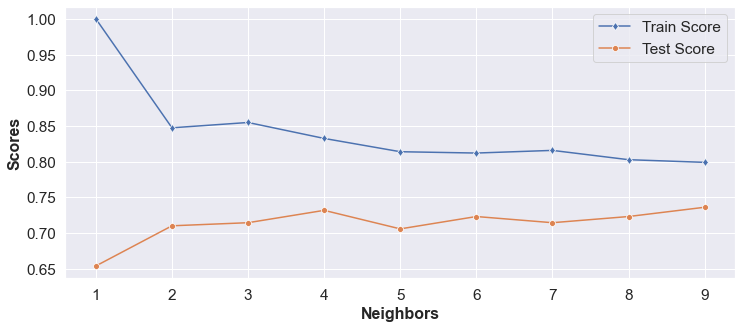

In [134]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10), y=train_scores, marker='d', label='Train Score')
p = sns.lineplot(x=range(1,10), y=test_scores, marker='o', label='Test Score')
p.set_xlabel('Neighbors', fontweight='bold', fontsize=16)
p.set_ylabel('Scores', fontweight='bold', fontsize=16)
plt.show();

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [167]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Train score: {:.6f}".format(knn.score(X_train, y_train)))
print("Test score: {:.6f}".format(knn.score(X_test, y_test)))

Train score: 0.832402
Test score: 0.731602


In [168]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', cm)

Confusion matrix: 
 [[137  14]
 [ 48  32]]


**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

In [169]:
def confusion_matrix_plot(cm, plotTitle):
    # Convert the confusion matrix to percentage values for each class
    matrix = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] ,2)

    # Build the plot
    plt.figure(figsize=(5,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':14},
                cmap=plt.cm.Oranges, linewidths=0.2)

    plt.xlabel('Predicted label', fontweight='bold')
    plt.ylabel('True label', fontweight='bold')
    plt.title(plotTitle, fontweight='bold')
    plt.show()

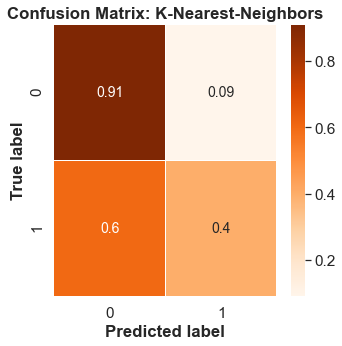

In [171]:
confusion_matrix_plot(cm, 'Confusion Matrix: K-Nearest-Neighbors')

**<font color='teal'> Print the classification report </font>**

In [114]:
from sklearn.metrics import classification_report
print('Classification_report: \n', classification_report(y_test, y_pred))

Classification_report: 
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       151
           1       0.70      0.40      0.51        80

    accuracy                           0.73       231
   macro avg       0.72      0.65      0.66       231
weighted avg       0.72      0.73      0.71       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [141]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, verbose=1)
knn_cv.fit(X,y)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             verbose=1)

#### Print the best score and best parameter for n_neighbors.

In [142]:
print("Best Score: {:.2}".format(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score: 0.75
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

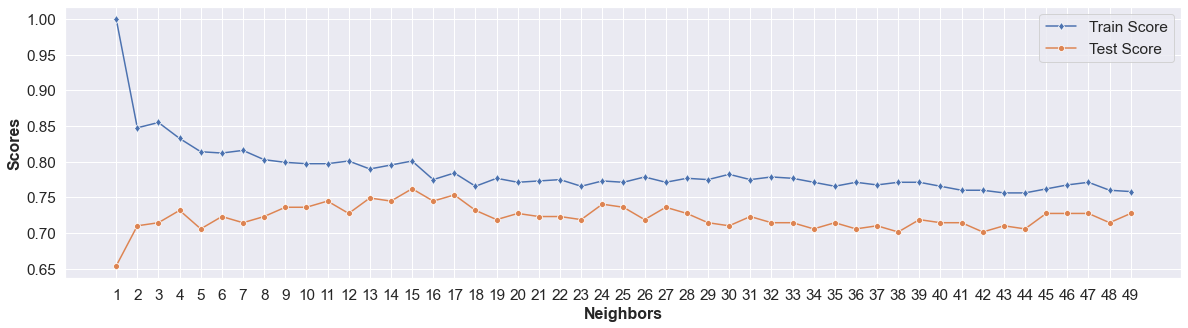

In [143]:
test_scores = []
train_scores = []

n_neighbors = 50

for i in range(1,n_neighbors):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

x = range(1, n_neighbors)    
plt.figure(figsize=(20,5))
p = sns.lineplot(x=x, y=train_scores, marker='d', label='Train Score')
p = sns.lineplot(x=x, y=test_scores, marker='o', label='Test Score')
p.set_xlabel('Neighbors', fontweight='bold', fontsize=16)
p.set_ylabel('Scores', fontweight='bold', fontsize=16)
p.set_xticks(list(x))
plt.show();    

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [144]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 12],
    'n_estimators': [10, 20, 50, 100, 200, 300]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [145]:
# Fit the grid search to the data
model=grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

In [146]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [147]:
model.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [176]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, log_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)

ac = accuracy_score(y_test, y_pred)
print('Random Forest: Accuracy = %.2f' % (ac))

f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest: f1-score = %.2f' % (f1))


cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix: \n', cm)

roc = roc_auc_score(y_test, y_pred)
print('\nRandom Forest: roc = %.2f'%(roc))

Random Forest: Accuracy = 0.77
Random Forest: f1-score = 0.77

Confusion matrix: 
 [[129  22]
 [ 31  49]]

Random Forest: roc = 0.73


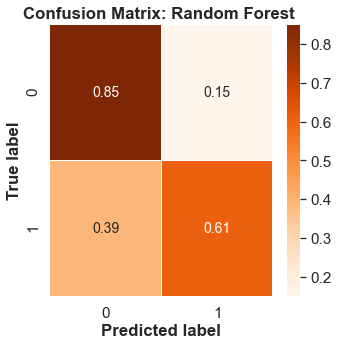

In [177]:
confusion_matrix_plot(cm, 'Confusion Matrix: Random Forest ')

In [178]:
print('Classification_report: \n', classification_report(y_test, y_pred))

Classification_report: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.69      0.61      0.65        80

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



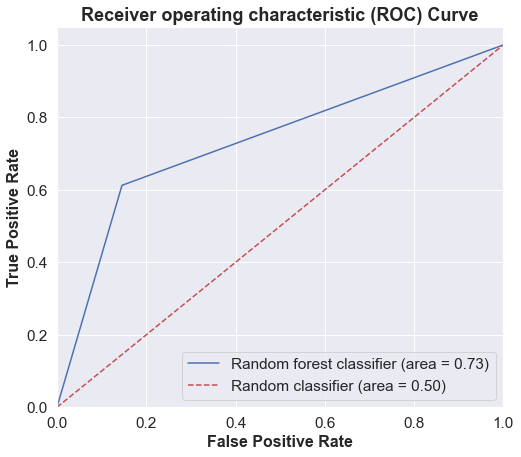

In [179]:
# Plot Receiver operating characteristic (ROC) Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label='Random forest classifier (area = %0.2f)' % roc )
plt.plot([0, 1], [0, 1],'r--', label='Random classifier (area = %0.2f)' % 0.50 )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=16)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=16)
plt.title('Receiver operating characteristic (ROC) Curve', fontweight='bold', fontsize=18)
plt.legend(loc="lower right")
plt.savefig('Random_Rorest_ROC')
plt.show()